In [34]:
import numpy as np
import pandas as pd
import scipy.io
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [15]:
matlab_filename = "realitymining.mat"
print "Loading file. Takes time"
matlab_obj = scipy.io.loadmat(matlab_filename)
friends = np.nan_to_num(matlab_obj['network']['friends'][0,0])

Loading file. Takes time


In [16]:
data = np.loadtxt("call_log.csv",delimiter=',',skiprows=1)
asym = np.loadtxt("asym_index.txt")

In [28]:
def convertDatetime(dt):
    return datetime.fromordinal(int(dt)) + timedelta(days=dt%1) - timedelta(days=366) - timedelta(hours=5)

In [63]:
freq_good = 0
freq_bad = 0
for i in range(0,asym.shape[0]):
    for j in range(0,data.shape[0]):
        if asym[i][0] == data[j][0] and asym[i][1] == data[j][1]:
            freq_good += 1
        if asym[i][1] == data[j][0] and asym[i][0] == data[j][1]:
            freq_bad += 1
            
print "No. of time good friends call bad friends = %d" %freq_good
print "No. of time bad friends call good friends = %d" %freq_bad

No. of time good friends call bad friends = 625
No. of time bad friends call good friends = 386


In [68]:
time_hour = np.zeros(data.shape[0])
for i in range(0,data.shape[0]):
    time_hour[i] = convertDatetime(data[i][3]).hour

In [66]:
hour_freq_one_way = np.zeros(24)
for i in range(0,94):
    for j in range(i+1,94):
        if friends[i,j] == 1 and friends[j,i] == 1:
            for k in range(0,data.shape[0]):
                if i == data[k][0] and j == data[k][1]:
                    hour_freq_one_way[int(time_hour[k])] += 1
                if j == data[k][0] and i == data[k][1]:
                    hour_freq_one_way[[int(time_hour[k])]] += 1

Hourly frequency of voice calls between symmetric friends


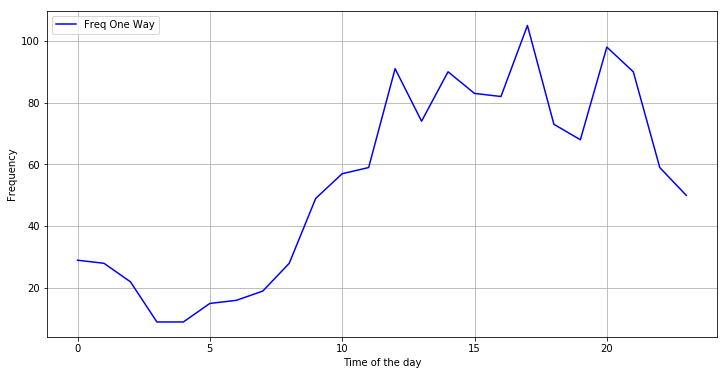

In [69]:
plt.figure(figsize=(12,6))
plt.plot(hour_freq_one_way,"blue",label="Freq One Way")
plt.xlabel("Time of the day")
plt.ylabel("Frequency")
plt.legend(loc="upper left")
plt.grid()
print "Hourly frequency of voice calls between symmetric friends"
plt.show()

In [39]:
hour_good_friend = np.zeros(24)
hour_bad_friend = np.zeros(24)

for i in range(0,asym.shape[0]):
    for j in range(0,data.shape[0]):
        if asym[i][0] == data[j][0] and asym[i][1] == data[j][1]:
            hour_good_friend[int(time_hour[j])] += 1
        if asym[i][1] == data[j][0] and asym[i][0] == data[j][1]:
            hour_bad_friend[int(time_hour[j])] += 1

Hourly frequency of voice calls between asymmetric friends
The correlation between the two arrays = 0.778225


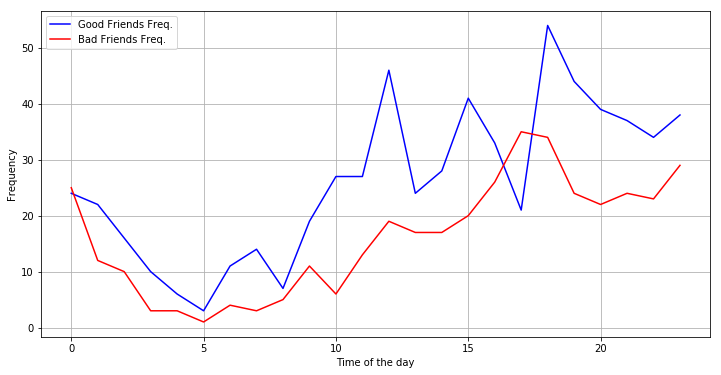

In [58]:
plt.figure(figsize=(12,6))
plt.plot(hour_good_friend,"blue",label="Good Friends Freq.")
plt.plot(hour_bad_friend,"red",label="Bad Friends Freq." )
plt.xlabel("Time of the day")
plt.ylabel("Frequency")
plt.legend(loc="upper left")
plt.grid()
print "Hourly frequency of voice calls between asymmetric friends"
print "The correlation between the two arrays = %f" %np.corrcoef(hour_bad_friend,hour_good_friend)[0,1]
plt.show()

In [ ]:
dates = []
month_freq =[]
for year in range(2014, 2016):
    for month in range(1, 12):
        for i in range(0,94):
            for j in range(i+1,94):
                if friends[i,j] == 1 and friends[j,i] == 1:
                    for k in range(0,data.shape[0]):
                        if i == data[k][0] and j == data[k][1]:
                            hour_freq_one_way[int(time_hour[k])] += 1
                        if j == data[k][0] and i == data[k][1]:
                            hour_freq_one_way[[int(time_hour[k])]] += 1
                    dates.append(dt.datetime(year=year, month=month))